In [5]:
import numpy as np, matplotlib.pylab as plt
from astropy import cosmology
from astropy.cosmology import Planck15

In [9]:
#testing to see if cosmo.luminosity works as was shown in example
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

test = cosmo.luminosity_distance(4) #test value to check function
print(test) # this value is slightly different than what is shown on the example doc?

35851.83207231645 Mpc


In [19]:
def get_alpha(vt_ligo, vt_l1): # calculating alpha
    alpha = vt_ligo/vt_l1
    return alpha

def get_max_sources(vt_x, vt_ligo, vt_l1): # calculating max sources
    a = get_alpha(vt_ligo,vt_l1)
    max_sources = (vt_x/vt_ligo)*(1/a)
    return max_sources

In [10]:
mass = np.array([200,400,600,800]) # mass
vt_ligo = np.array([16040,5650,1090,200]) # vt ligo from paper in MPcs

In [20]:
vt_l1 = np.array([2025,1578,1018,586]) # vt l1 from calculator
z_l1 = np.zeros(len(vt_l1))
# print(z_l1)

test = np.arange(0,2,0.1)
#print(test)

#iteratively finding redshift values
a = 0
for i in vt_l1:
    dif = 10000
    for j in test:
        z = cosmo.luminosity_distance(test[j])
        print(z)
       # dist = i-j
       # if dist < dif:
       #     z_current = z
       # z_l1[a] = z_current
   # a += 1

print(z_l1)


vt_ce = np.array([5820,5448,5097,4763]) # vt ce from calculator
vt_ce = vt_ce**3
vt_voyager = np.array([4498,4080,3448, 2836]) # vt voyager from calculator
vt_voyager = vt_voyager**3

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Max Sources CE: [6362610073170.312, 19903772437658.97, 117580211997224.28, 543593933366532.3]


<function matplotlib.pyplot.show(close=None, block=None)>

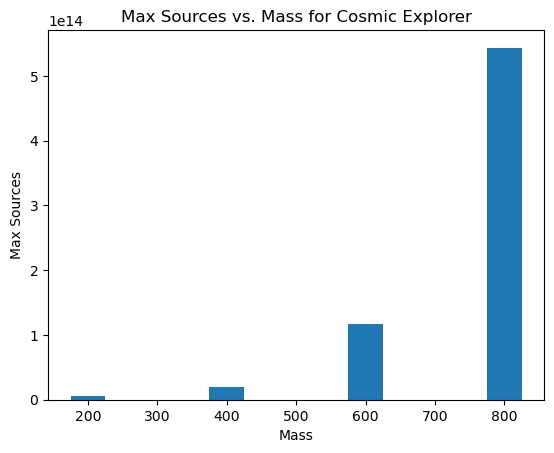

In [21]:
max_sources_ce = []

#calculating max sources for cosmic explorer
for i in range(len(mass)):
    #m = mass[i]
    ligo = vt_ligo[i]
    l1 = vt_l1[i]
    ce = vt_ce[i]
    max = get_max_sources(ce,ligo,l1)
    max_sources_ce.append(max)
    #print("For Cosmic Explorer, the max number of sources for mass", mass[i], "solar mass is", max)

print("Max Sources CE:",max_sources_ce)

# plotting max sources vs. mass
plt.bar(mass,max_sources_ce, 50)
plt.title("Max Sources vs. Mass for Cosmic Explorer")
plt.ylabel("Max Sources")
plt.xlabel("Mass")
plt.show

Max Sources Voyager: [3487450879283.185, 13300435012645.357, 95947150797972.16, 543593933366532.3]


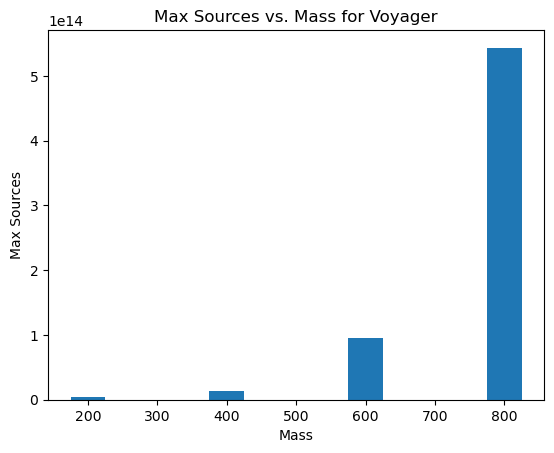

In [22]:
max_sources_voyager = []

# calculating max sources for voyager
for i in range(len(mass)): 
    #m = mass[i]
    ligo = vt_ligo[i]
    l1 = vt_l1[i]
    voyager = vt_voyager[i]
    max = get_max_sources(ce,ligo,l1)
    max_sources_voyager.append(max)
    # print("For Voyager, the max number of sources for mass", mass[i], "solar mass is", max)

print("Max Sources Voyager:",max_sources_voyager)

# plotting max sources vs. mass
plt.bar(mass, max_sources_voyager, 50)
plt.title("Max Sources vs. Mass for Voyager")
plt.ylabel("Max Sources")
plt.xlabel("Mass")
plt.show()